In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

### Modelo de Regressão Linear Simples

O modelo de regressão linear simples é dado por:

$$
\hat{y}^{(i)} = h_\theta(x^{(i)}) = \theta_0 + \theta_1 x^{(i)}
$$

Sendo $x^{(i)}$ o valor da característica do exemplo \( i \).

### Gradiente Descendente Estocástico (SGD)

No Gradiente Descendente Estocástico (SGD), o gradiente da função de custo é estimado utilizando apenas um único exemplo de treinamento por iteração, em vez de usar todos os exemplos como no gradiente descendente tradicional.

Consequentemente, a função de custo não será mais expressa como um somatório sobre todo o conjunto de dados, como mostrado a seguir:
$$
J(\theta) = \frac{1}{2} (\hat{y_i} - y_i)^2
$$

Implementando a função de custo abaixo, ficará:

In [2]:
def calcular_custo (theta_values, features, targets):
    theta_0 = theta_values[0]
    theta_1 = theta_values[1]

    for i in range(len(features)):
        pred = theta_0 + theta_1 * features[i]
        erro = pred - targets[i]
        custo = (1/2)*(erro**2)
    
    return custo

No SGD, o gradiente da função de custo não é mais a derivada do erro médio sobre todos os dados, mas sim a derivada do erro de apenas um único exemplo. Isso torna o processo de atualização mais rápido e frequente, porém com maior variação a cada passo.

$$
\frac{\partial J(\theta)}{\partial \theta_0} = (\hat{y_i} - y_i) x_i
$$

$$
\frac{\partial J(\theta)}{\partial \theta_1} = (\hat{y_i} - y_i) x_i
$$

A fórmula de atualização dos parâmetros $\theta$ permanece a mesma, mesmo no gradiente estocástico.

$$
\theta = \theta - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

Devido a sua natureza, sua implementação é mais simplificada, como mostrada abaixo:

In [3]:
def gradiente_estocástico (theta_values, features, targets, learning_rate):
    theta_0 = theta_values[0]
    theta_1 = theta_values[1]
    armazenar_custo = []
    armazenar_theta_0 = []
    armazenar_theta_1 = []

    for i in range(len(features)):
        armazenar_theta_0.append(theta_0)
        armazenar_theta_1.append(theta_1)
        pred = theta_0 + theta_1 * features[i]
        erro = pred - targets[i]
        custo = (1/2)*(erro**2)
        armazenar_custo.append(custo)
        theta_0 = theta_0 - learning_rate * erro
        theta_1 = theta_1 - (learning_rate * erro) * features[i]

    return [theta_0, theta_1], armazenar_custo, [armazenar_theta_0, armazenar_theta_1]

---
## Aplicação do Gradiente Estocástico (SGD)

No exemplo abaixo, é utilizado um conjunto de dados fictício, onde a primeira coluna descreve o tamanho das casas e a segunda, o valor delas.

In [4]:
##Carregar e formatar dados
data = np.loadtxt("Data/data1.txt", delimiter = ",")
x = data[:, 0]
y = data[:, 1]

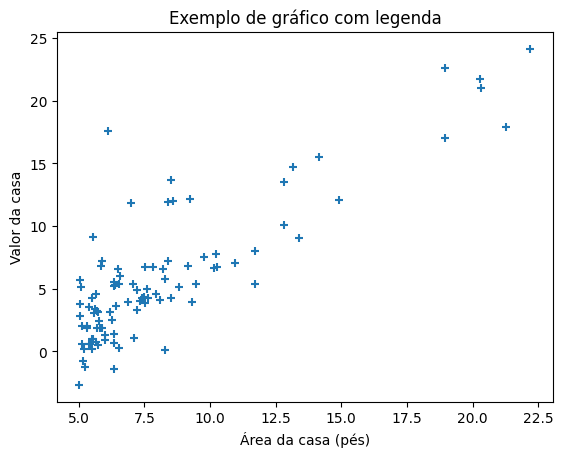

In [5]:
##Disposição dos dados no plano
plt.scatter(x, y, marker = "+")
plt.title('Exemplo de gráfico com legenda')
plt.xlabel('Área da casa (pés)')
plt.ylabel('Valor da casa')
plt.show()

In [6]:
## Inicialização dos Parâmetros
theta = [0, 0]
alpha = 0.01

In [7]:
theta_atualizado, custo_atualizado, hist_theta = gradiente_estocástico(theta, x, y, alpha)

In [8]:
##O valor atualizado de theta:
theta_atualizado

[-0.7621131748810138, 0.8272693736897936]

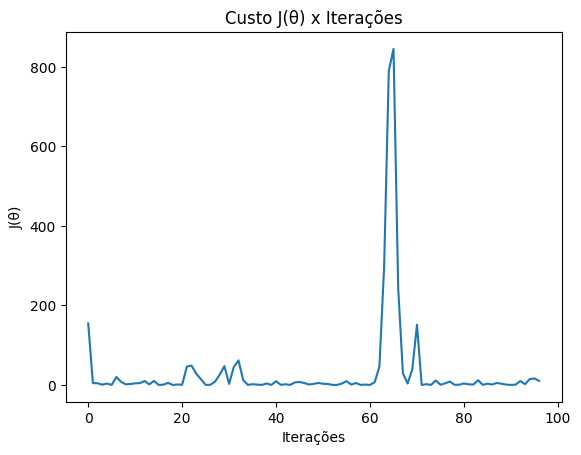

In [9]:
##Visualição do custo
plt.plot(custo_atualizado)
plt.title('Custo J(θ) x Iterações')
plt.xlabel('Iterações')
plt.ylabel('J(θ)')
plt.show()

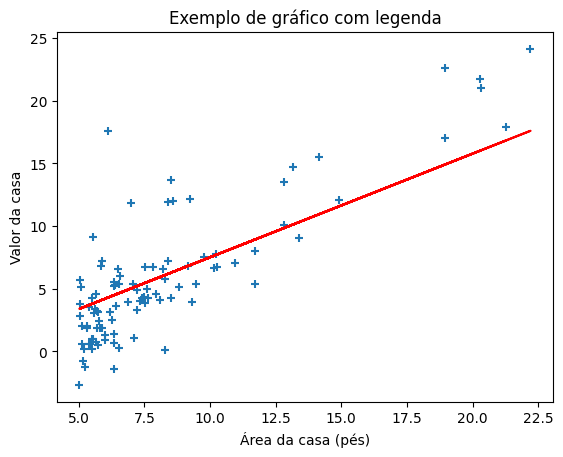

In [10]:
##Visualização da reta, com base nos valores de theta gerados
y_previstos = theta_atualizado[0] + theta_atualizado[1] * x

plt.scatter(x, y, marker = "+")
plt.plot(x, y_previstos, color = "red")
plt.title('Exemplo de gráfico com legenda')
plt.xlabel('Área da casa (pés)')
plt.ylabel('Valor da casa')
plt.show()

### Análise do Custo em Relação aos Parâmetros

Nesta etapa, analisamos como os valores de $\theta$ evoluem ao longo das iterações, observando o comportamento do gradiente e sua trajetória até a convergência.

Inicialmente, calcula-se o custo para cada combinação de $\theta_0$ e $\theta_1$, a fim de observar a forma da superfície da função de custo.

In [11]:
##Cálculo e formatação das variáveis para plot da superfície
theta_0_values = np.linspace(-10, 10, 100)
theta_1_values =  np.linspace(-10, 10, 100)
T0, T1 = np.meshgrid(theta_0_values, theta_1_values)
all_custo = []

for i in range(100):
    for j in range(100):
        all_custo.append(calcular_custo([theta_0_values[i], theta_1_values[j]], x, y))

J_vals = np.array(all_custo).reshape(100, 100)

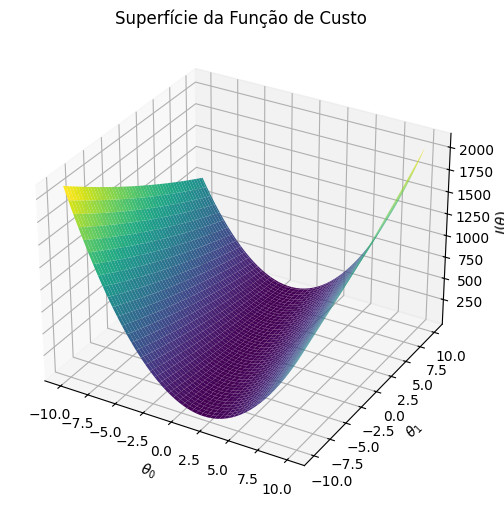

In [12]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, J_vals, cmap='viridis', edgecolor='none')
ax.set_title('Superfície da Função de Custo')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
plt.show()

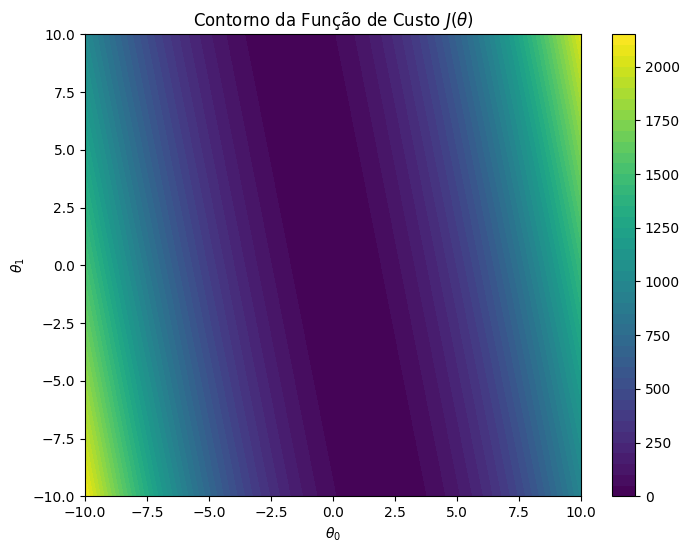

In [13]:
plt.figure(figsize=(8, 6))
cp = plt.contourf(T0, T1, J_vals, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('Contorno da Função de Custo $J(\\theta)$')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()

Agora analisando a trajetória do gradiente em cima da superfície do custo:

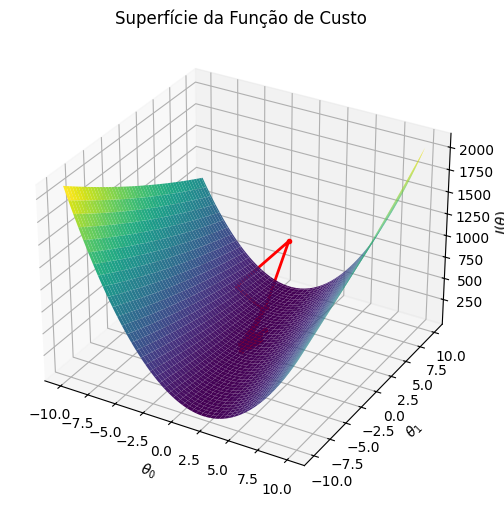

In [14]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(hist_theta[0], hist_theta[1], custo_atualizado, color='red', marker='o', markersize=3, linewidth=2, label='Trajetória')
ax.plot_surface(T0, T1, J_vals, cmap='viridis', edgecolor='none')
ax.set_title('Superfície da Função de Custo')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
plt.show()

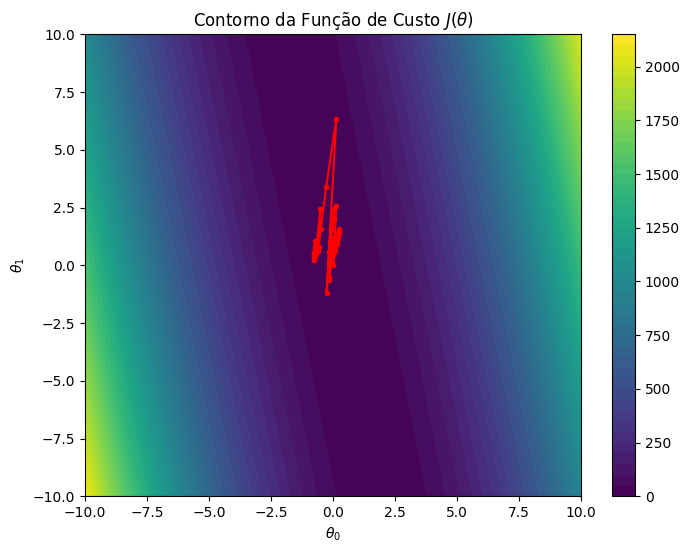

In [15]:
plt.figure(figsize=(8, 6))
cp = plt.contourf(T0, T1, J_vals, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.plot(hist_theta[0], hist_theta[1], color='red', marker='o', markersize=3, linewidth=1.5, label='Trajetória do Gradiente')
plt.title('Contorno da Função de Custo $J(\\theta)$')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()